In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mice_df= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#  Checking the number of mice.
mice_count= len(mice_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mice_df[mice_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_clean = mice_df.loc[mice_df["Mouse ID"]!="g989"]
duplicate_mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#  Checking the number of mice in the clean DataFrame.
new_mice_count = len(duplicate_mice_clean["Mouse ID"].unique())
new_mice_count


248

In [7]:
# Summary Statistics

In [8]:
#  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group = duplicate_mice_clean.groupby(["Drug Regimen"])

tumor_mean = group["Tumor Volume (mm3)"].mean()
tumor_mean
tumor_median = group["Tumor Volume (mm3)"].median()
tumor_median
tumor_variance = group["Tumor Volume (mm3)"].var()
tumor_variance
tumor_sd = group["Tumor Volume (mm3)"].std()
tumor_sd
tumor_sem = group["Tumor Volume (mm3)"].sem()
tumor_sem

tumor_summary = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_sd, tumor_sem],axis=1)
tumor_summary.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
tumor_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary_2 = duplicate_mice_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[tumor_mean, tumor_median, tumor_variance, tumor_sd, tumor_sem]})
tumor_summary_2
# Using the aggregation method, produce the same summary statistics in a single line


/var/folders/8q/b_mq_fn52rx57fpsx5thhnqr0000gn/T/ipykernel_2043/804932640.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tumor_summary_2 = duplicate_mice_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[tumor_mean, tumor_median, tumor_variance, tumor_sd, tumor_sem]})
/var/folders/8q/b_mq_fn52rx57fpsx5thhnqr0000gn/T/ipykernel_2043/804932640.py:2: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  tumor_summary_2 = duplicate_mice_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[tumor_mean, tumor_median, tumor_variance, tumor_sd, tumor_sem]})


TypeError: 'float' object is not callable

In [ ]:
# Bar and Pie Charts

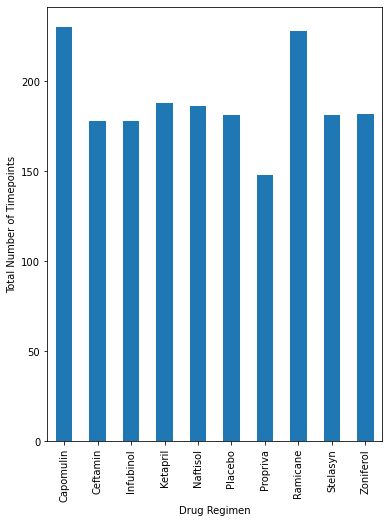

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_timepoint = duplicate_mice_clean.groupby("Drug Regimen")
pt = pandas_timepoint["Timepoint"].count()

pandas_bar = pt.plot(kind="bar", figsize=(6,8))

pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Total Number of Timepoints")

plt.show()
plt.tight_layout()


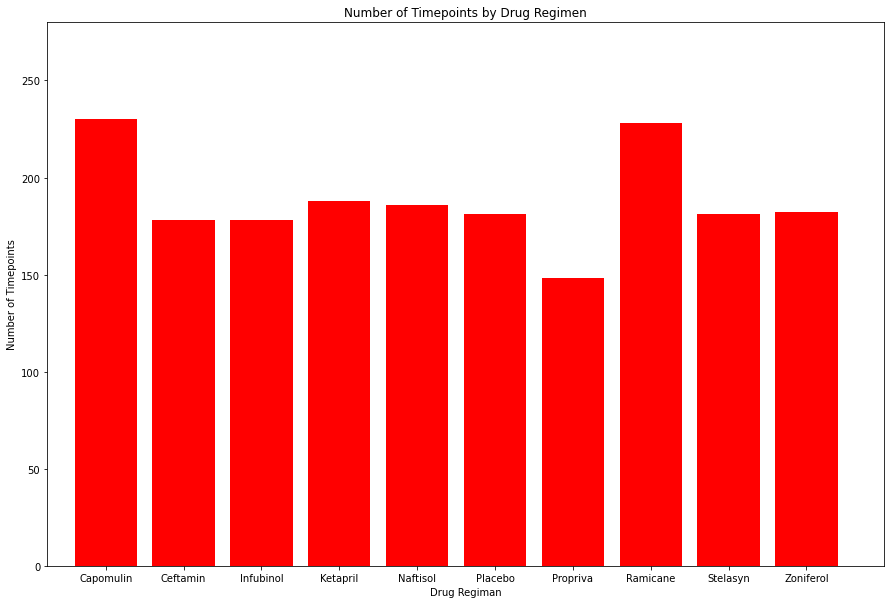

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(pandas_timepoint))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, pt, color="r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(pt)+50)
plt.title("Number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regiman")
plt.ylabel("Number of Timepoints")
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
from lib2to3.pgen2.token import EQUAL


fvm = duplicate_mice_clean.groupby("Sex")
female_vs_male = fvm["Sex"].count()
female_vs_male

Gender = ["Sex"]
min_amount = 500
one_gender = female_vs_male.loc[Gender]
one_gender = one_gender.loc[one_gender["Sex"]>min_amount,:]

pandas_pie = one_gender.plot(kind="pie", y="Sex", Title=("Distribution of" + Gender + str(min_amount)))
pandas_pie.set_ylabel("Gender")

plt.axis("equal")
plt.show()




KeyError: 'Sex'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [ ]:
# Quartiles, Outliers, and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
